In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime

from tqdm.notebook import tqdm
from scipy import  stats

In [43]:
data = pd.read_csv('STORAGE_data/es-1min_FULL.csv')
normal_datetime = data
normal_datetime.index = pd.to_datetime(normal_datetime.date + ' ' + normal_datetime.time)

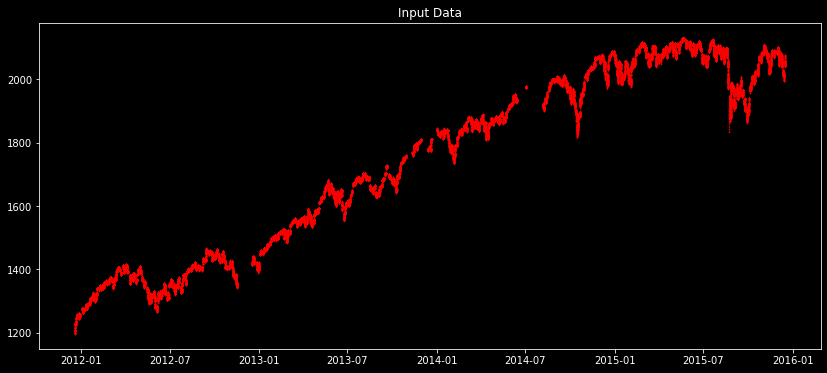

In [44]:
plt.style.use('dark_background')
plt.figure(figsize=(14,6))
plt.title('Input Data')
plt.plot(normal_datetime.open, 'o', markersize=.3, alpha=.7, color='red')
plt.show()

In [45]:
data = normal_datetime['2012-01': '2013-09'].resample('1H').first()

In [62]:
def CREATE_PNL(normal_datetime, X_THRESHOLD):
    MONEY = 100_000

    BOUHT_DATE = []
    MONEY_DATE = []
    start_carette = 40_000
    for _ in tqdm(normal_datetime.index[start_carette:], total=normal_datetime.shape[0] - start_carette):
        try:
            if (normal_datetime.loc[_, 'time'] == '14:30:00') and (normal_datetime.loc[_, 'open'].astype(str) != 'nan'):
                today_data = normal_datetime.loc[_, :]
                back_index = _ - pd.DateOffset(days=1, minutes=5) + pd.DateOffset(hours=1)
                data_back = normal_datetime.loc[back_index, :]
                if str(data_back.close) != 'nan':
                    if (today_data.open / data_back.close) - 1 > X_THRESHOLD:
                        # print(today_data)
                        # print(data_back)
                        # print('------')

                        MONEY = (MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(hours=1) - pd.DateOffset(minutes=1), :].close
                        MONEY_DATE.append(MONEY)
                        BOUHT_DATE.append(today_data.date)
        except KeyError:
            pass
        except ValueError:
            if (str(normal_datetime.loc[_, 'time'][:1]) == '14:30:00') and (normal_datetime.loc[_, 'open'][:1].astype(str) != 'nan'):
                today_data = normal_datetime.loc[_, :]
                back_index = _ - pd.DateOffset(days=1, minutes=5) + pd.DateOffset(hours=1)
                data_back = normal_datetime.loc[back_index, :]
                if str(data_back.close) != 'nan':
                    if (today_data.open / data_back.close) - 1 > X_THRESHOLD:
                        # print(today_data)
                        # print(data_back)
                        # print('------')

                        MONEY = (MONEY / today_data.open) * normal_datetime.loc[_ + pd.DateOffset(hours=1) - pd.DateOffset(minutes=1), :].close
                        MONEY_DATE.append(MONEY)
                        BOUHT_DATE.append(today_data.date)

    plt.style.use('dark_background')
    plt.figure(figsize=(14,6))
    plt.title(f"PNL FOR X_THRESHOLD:{X_THRESHOLD * 100} %")
    plt.plot([pd.to_datetime(_) for _ in BOUHT_DATE], MONEY_DATE, markersize=.3, alpha=.7, color='red')
    plt.show()
    return [BOUHT_DATE, MONEY_DATE]

  0%|          | 0/6.0 [00:00<?, ?it/s]

  0%|          | 0/350552 [00:00<?, ?it/s]

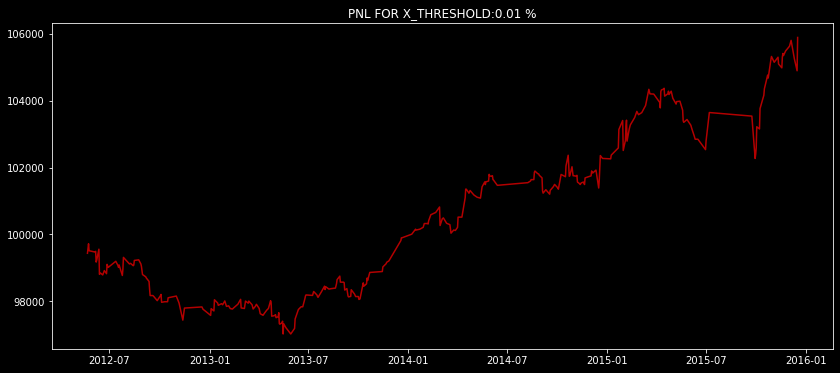

  0%|          | 0/350552 [00:00<?, ?it/s]

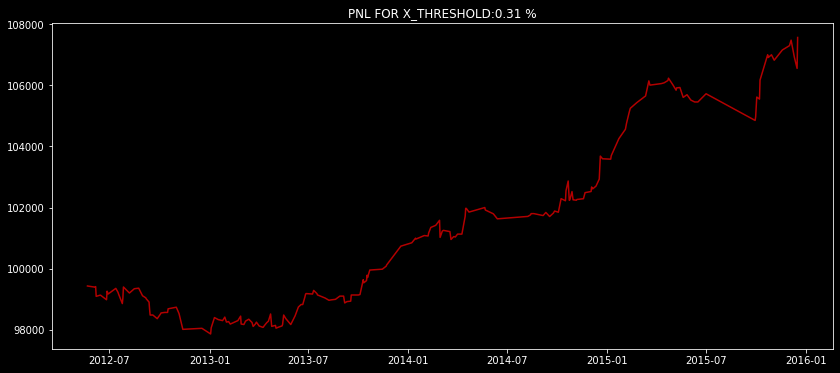

  0%|          | 0/350552 [00:00<?, ?it/s]

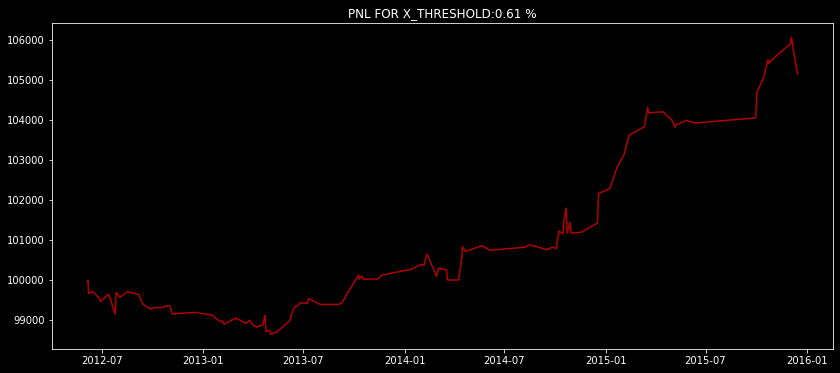

  0%|          | 0/350552 [00:00<?, ?it/s]

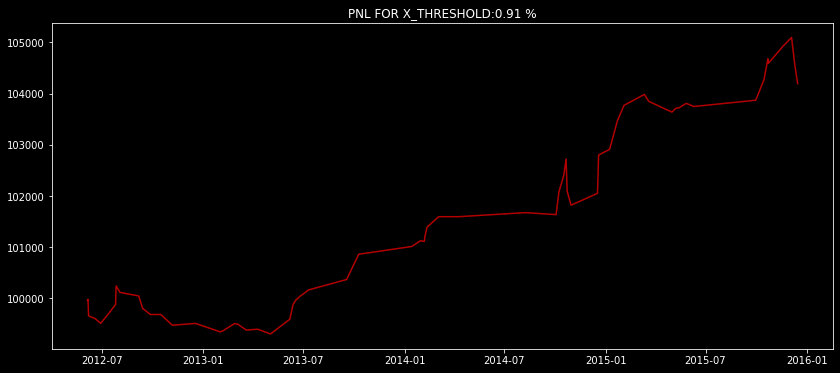

  0%|          | 0/350552 [00:00<?, ?it/s]

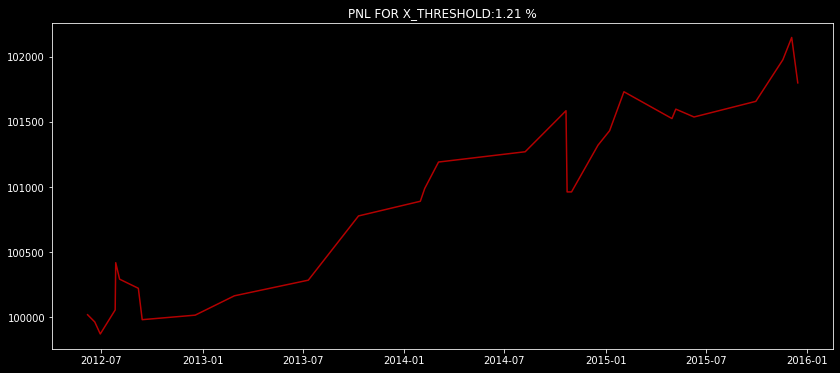

  0%|          | 0/350552 [00:00<?, ?it/s]

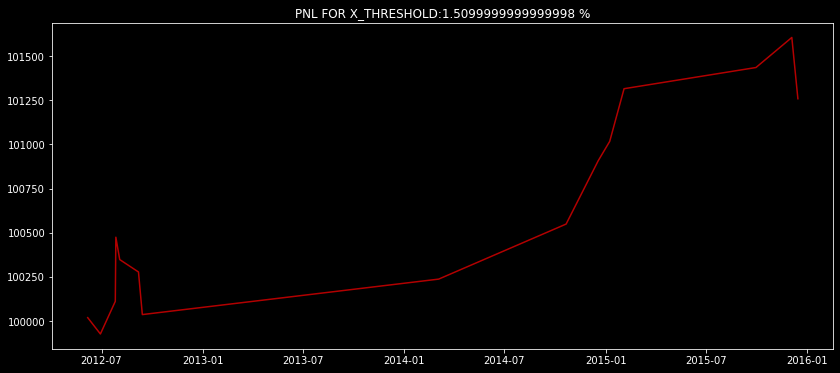

  0%|          | 0/350552 [00:00<?, ?it/s]

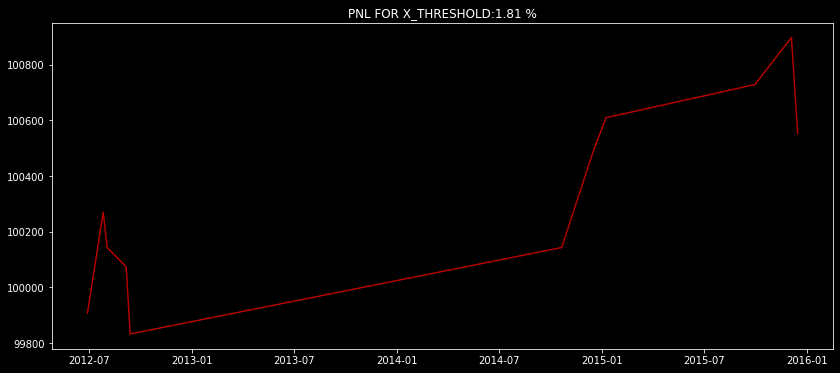

In [66]:
RESULT = list()
for X_TH in tqdm(np.arange(.0001, .02, .003), total=(0.02 - 0.0001) // .003):
    RESULT.append(CREATE_PNL(normal_datetime, X_TH))